In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation
from sklearn.preprocessing import StandardScaler

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%y %H:%M')
df = pd.read_csv('../datatraining.csv', sep=";", parse_dates=True, index_col='date', date_parser=dateparse)
df.head()

,id,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-04 17:51:00,1,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:00,2,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,3,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,4,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,5,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
df.loc[df['id'] == 3832, 'Light'] = 215
df.loc[df['id'] == 3833, 'Light'] = 215
df.loc[df['id'] == 3834, 'Light'] = 215
df.loc[df['id'] == 3831, 'Light'] = 215

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


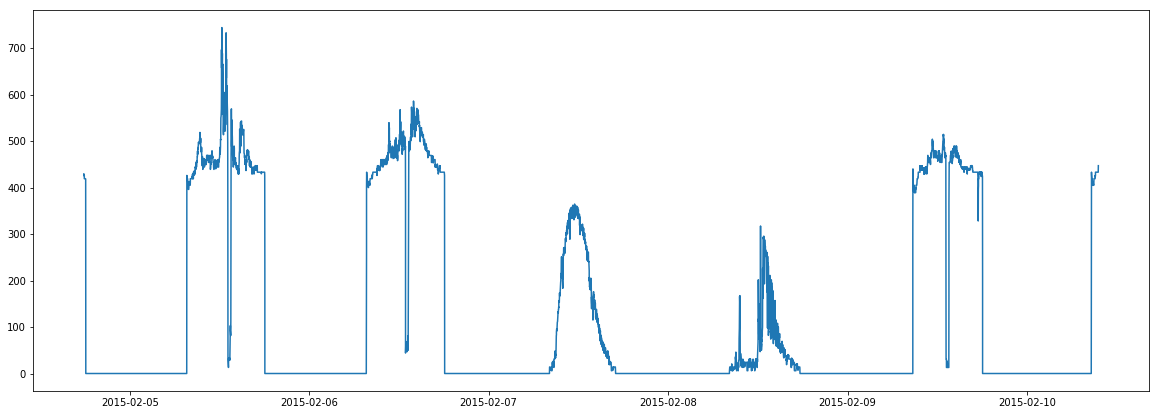

In [4]:
ts = df['Light']
plt.figure(figsize=(20,7))
plt.plot(ts)
plt.show()

In [5]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts)

In [6]:
# SAX transform
n_paa_segments = 80
n_sax_symbols = 40
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_ts_inv = sax.inverse_transform(ts_sax)

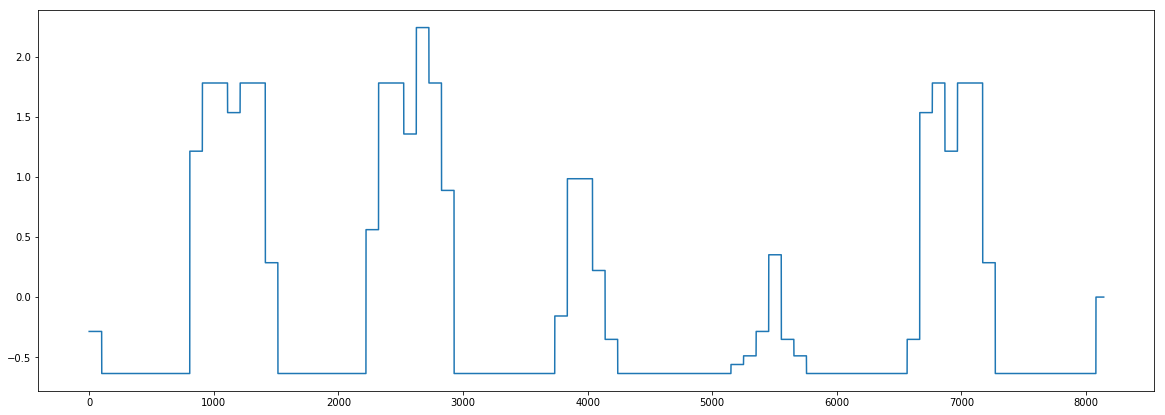

In [7]:
plt.figure(figsize=(20,7))
plt.plot(sax_ts_inv.ravel())
plt.show()

In [8]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_ts_inv.ravel()))}
map_symbols

{-0.6356570136975827: 0,
 -0.5607030318750833: 1,
 -0.4887764111146695: 2,
 -0.35178434493515626: 3,
 -0.2858408748811656: 4,
 -0.1573106846101707: 5,
 0.0: 6,
 0.22111871299757055: 7,
 0.2858408748811657: 8,
 0.3517843449351561: 9,
 0.5607030318750833: 10,
 0.887146559018876: 11,
 0.984234960446325: 12,
 1.2133396224885171: 13,
 1.3563117453352471: 14,
 1.5341205443525463: 15,
 1.7804643416920256: 16,
 2.241402727604947: 17}

In [9]:
seq = np.array([map_symbols[v] for v in sax_ts_inv.ravel()])

In [10]:
seq

array([4, 4, 4, ..., 6, 6, 6])

In [11]:
Light = df['Light'].copy()

In [12]:
#Making more datasets with the division for DAY
days = [g for n, g in Light.groupby(pd.TimeGrouper('D'))]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


In [13]:
#Deleting the first and the last day, they are not completed
del days[0]
del days[-1]

In [14]:
#for i in range(0, len(days)):
#    days[i]=(((days[i])/days[i].std()).mean())

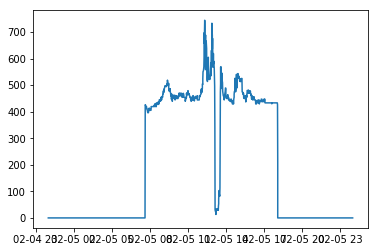

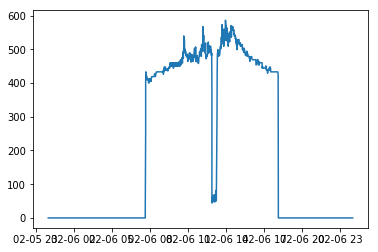

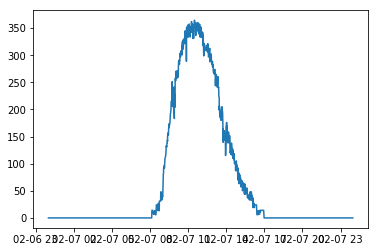

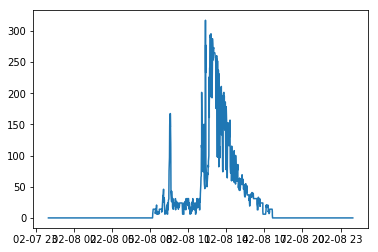

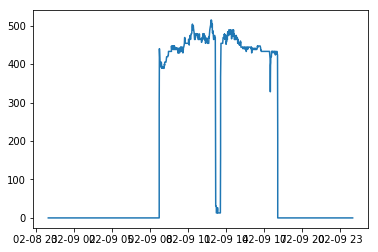

In [15]:
#Plotting the time series for each day of hour
for i in range(0, 5):
    ts=days[i]
    plt.plot(ts)
    plt.show()

In [16]:
#Trasform the the list in array
days=np.asarray(days)

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
X = scaler.fit_transform(days)

In [44]:
#X=days
n_paa_segments = 10
n_sax_symbols = 5
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
X_sax = sax.fit_transform(X)
sax_X_inv = sax.inverse_transform(X_sax)

In [45]:
#sax_X_inv[2]=sax_X_inv[2]-(1.6448536269514722- 0.7835003753897741)
#sax_X_inv[3]=sax_X_inv[3]-(2.128045234184983- 0.7835003753897741)

In [46]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_X_inv.ravel()))}
map_symbols

{0.0: 0, 0.5244005127080407: 1, 1.2815515655446004: 2}

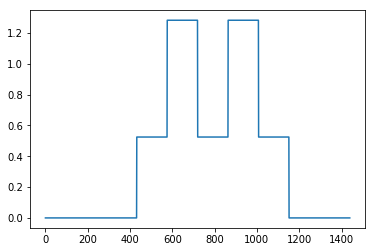

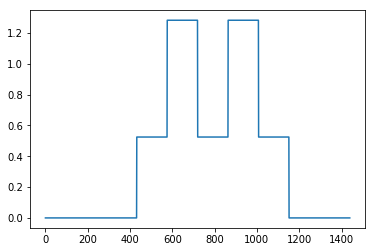

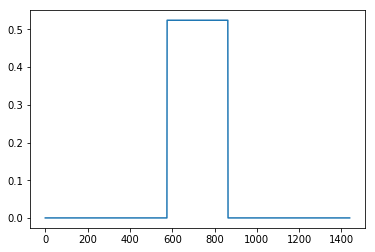

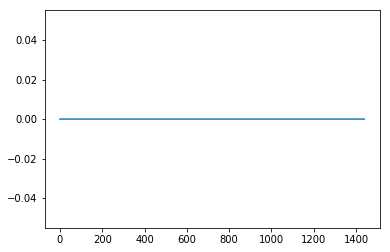

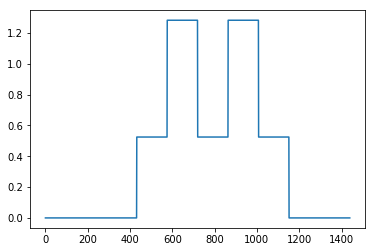

In [47]:
for i in range(0, len(sax_X_inv)):
    plt.plot(sax_X_inv[i])
    plt.show()

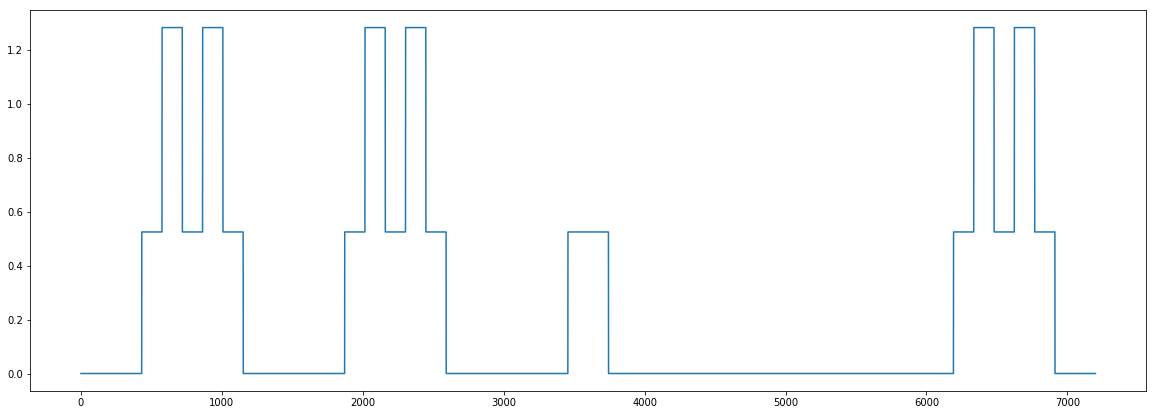

In [48]:
plt.figure(figsize=(20,7))
plt.plot(sax_X_inv.ravel())
plt.show()

In [49]:
X_seq = list()
for x in sax_X_inv:
    X_seq.append([map_symbols.get(v, -10) for v in x.ravel()])

In [50]:
from prefixspan import PrefixSpan

In [51]:
ps = PrefixSpan(X_seq)

In [53]:
ps.frequent(2, closed=True)

[(5,
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,

In [40]:
ps.topk(5, closed=True)

[(5,
  [2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,